# K-Nearest Neighbor Classification for NBA Rookies

In this notebook, we will analyze a dataset containing game statistics from NBA rookies' first season with the aim of predicting whether they will last in the NBA for at least 5 years or not. This binary classification problem will be approached using a K-Nearest Neighbors (KNN) algorithm implemented from scratch. The target variable is encoded as 1 (stayed in the NBA for 5+ years) or 0 (did not stay for 5+ years).

We will proceed through the following structured steps:

* Import Necessary Libraries
* Load and Prepare the Dataset
* KNN Implementation
* Apply KNN to Classification Problem
* Tune the Hyperparameter k
* Evaluate Final Model Performance

## 1. Import necessary libraries

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

## 2. Load and prepare the dataset

### Display dataset information

In [6]:
nba_data = pd.read_csv('nba-rookies.csv')

print("Dataset Overview:")
print(nba_data.head())
print("\nInformation about the Dataset:")
nba_data.info()

Dataset Overview:
   Unnamed: 0             name  gp   min  pts  fgm  fga    fg  3p_made  3pa  \
0           0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1   
1           1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8   
2           2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7   
3           3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5   
4           4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   

   ...  fta    ft  oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
0  ...  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1  ...  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2  ...  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3  ...  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4  ...  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  

[5 rows x 22 columns]

Information about the Dataset:
<class 'pandas.core.frame.DataFr

### Remove duplicates, display target class distribution and features

In [7]:
nba_data_clean = nba_data.drop_duplicates(subset=['name'], keep='first')
print(f"\nDataset size before removing duplicates: {nba_data.shape}")
print(f"Dataset size after removing duplicates: {nba_data_clean.shape}")

print("\nTarget class distribution:")
print(nba_data_clean['target_5yrs'].value_counts())
print()
print((nba_data_clean['target_5yrs'].value_counts(normalize=True) * 100).round(2))

X = nba_data_clean.drop(['name', 'Unnamed: 0', 'target_5yrs'], axis=1)
y = nba_data_clean['target_5yrs']
print("\nAll features:")
print(X.columns.tolist())


Dataset size before removing duplicates: (1340, 22)
Dataset size after removing duplicates: (1294, 22)

Target class distribution:
target_5yrs
1    807
0    487
Name: count, dtype: int64

target_5yrs
1    62.36
0    37.64
Name: proportion, dtype: float64

All features:
['gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov']


### Standardize features and split into training and test sets

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nSplit into training (80%) and test sets (20%)")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Split into training (80%) and test sets (20%)
Training set: 1035 samples
Test set: 259 samples


## 3. KNN Implementation


In [9]:
class KNN:
    def __init__(self, X_train, y_train, k=5):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = np.unique(y_train)
        self.k = k
    
    def predict(self, X_test):
        y_pred = []
        
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train.iloc[k_nearest_indices]
            
            unique_classes, counts = np.unique(k_nearest_labels, return_counts=True)
            most_common_class = unique_classes[np.argmax(counts)]
            y_pred.append(most_common_class)
            
        return np.array(y_pred)
        

## 4. Apply KNN to Classification Problem with default k=5

In [10]:
knn = KNN(X_train, y_train, k=5)

y_pred = knn.predict(X_test)

accuracy = np.mean(y_test == y_pred)
print(f"\nTest accuracy with k=5: {accuracy:.4f}")


Test accuracy with k=5: 0.6641


## 5. Tune the Hyperparameter k to find the optimal value for k

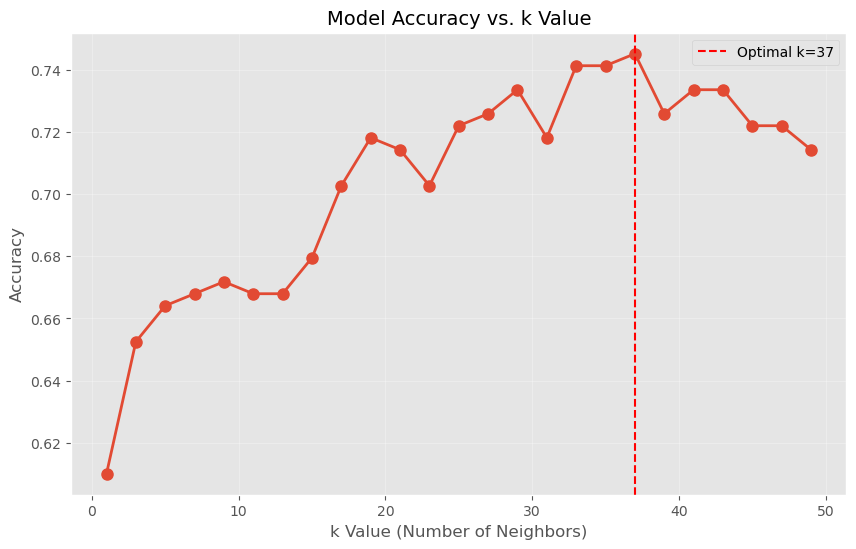

In [11]:
k_values = range(1, 50, 2)

k_accuracies = []

for k in k_values:
    knn = KNN(X_train, y_train, k=k)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    k_accuracies.append(accuracy)

optimal_k = k_values[np.argmax(k_accuracies)]

plt.figure(figsize=(10, 6))
plt.plot(k_values, k_accuracies, 'o-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('k Value (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy vs. k Value', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 6. Evaluate Final Model Performance with optimal k

In [12]:
final_knn = KNN(X_train, y_train, k=optimal_k)

final_y_pred = final_knn.predict(X_test)

final_accuracy = np.mean(y_test == final_y_pred)
print(f"\nFinal model accuracy with k={optimal_k}: {final_accuracy:.4f}")


Final model accuracy with k=37: 0.7452
